# Complex Numbers and Complex-Valued Signals in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here is how we create complex numbers in Python. Note that you need a numerical value directly before the `j` (square root of -1). So, `j` by itself is **not** a valid complex number, but `1j` or `1.0j` is.

In [2]:
z = 2.0 + 3.0j
print(z)

z = complex(2.0, 3.0)
print(z)

(2+3j)
(2+3j)


We can extract the real and imaginary parts of a complex number like so:

In [3]:
print("The real part of z =", np.real(z))
print("The imaginary part of z =", np.imag(z))

The real part of z = 2.0
The imaginary part of z = 3.0


Or the modulus (absolute value) and argument (angle) like so:

In [4]:
print("The modulus of z =", np.abs(z))
print("The argument of z =", np.angle(z), "radians, which is", np.rad2deg(np.angle(z)), "degrees")

The modulus of z = 3.605551275463989
The argument of z = 0.982793723247329 radians, which is 56.309932474020215 degrees


Basic arithmetic on complex numbers works the way you think it would.

In [5]:
z1 = 2.0 + 3.0j
z2 = 1.0 + 4.0j

print("z1 + z2 =", z1 + z2)
print("z1 * z2 =", z1 * z2)
print("z1^3 =", z1**3)
print("1.0 / z1 =", z1**-1)
print("sqrt(z1) =", np.sqrt(z1))

z1 + z2 = (3+7j)
z1 * z2 = (-10+11j)
z1^3 = (-46+9j)
1.0 / z1 = (0.15384615384615385-0.23076923076923078j)
sqrt(z1) = (1.6741492280355401+0.8959774761298381j)


This is a function for polar plotting complex numbers. Taken from here: [https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_ComplexNumbers.html](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_ComplexNumbers.html)

In [6]:
def plot_polar_vector(c, label=None, color=None, start=0, linestyle='-'):
    # plot line in polar plane
    line = plt.polar([np.angle(start), np.angle(c)], [np.abs(start), np.abs(c)], label=label, 
                     color=color, linestyle=linestyle)
    # plot arrow in same color
    this_color = line[0].get_color() if color is None else color
    plt.annotate('', xytext=(np.angle(start), np.abs(start)), xy=(np.angle(c), np.abs(c)),
                 arrowprops=dict(facecolor=this_color, edgecolor='none', 
                                 headlength=12, headwidth=10, shrink=1, width=0))

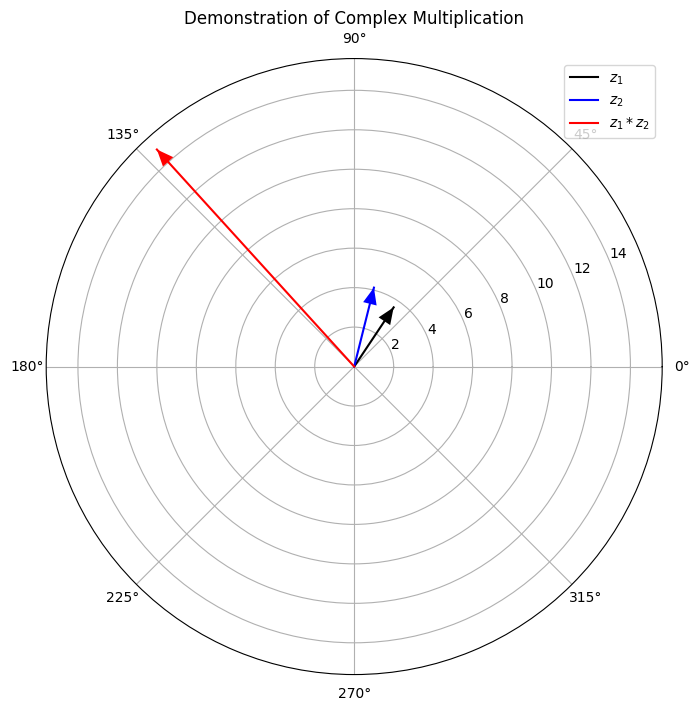

In [7]:
plt.figure(figsize = (8, 8))
plot_polar_vector(z1, label = "$z_1$", color = "k")
plot_polar_vector(z2, label = "$z_2$", color = "b")
plot_polar_vector(z1 * z2, label = "$z_1 * z_2$", color = "r")
plt.legend()
plt.title("Demonstration of Complex Multiplication")
plt.show()

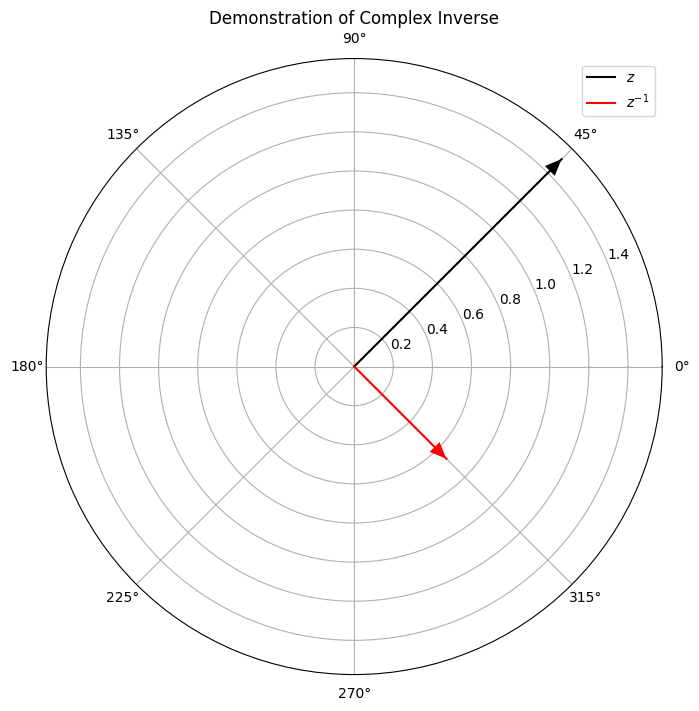

In [8]:
# Making a complex number using its polar form
phi = np.pi / 4.0
r = 1.5
z = r * (np.cos(phi) + np.sin(phi) * 1j)
z_inv = z**-1

plt.figure(figsize = (8, 8))
plot_polar_vector(z, label = "$z$", color = "k")
plot_polar_vector(z_inv, label = "$z^{-1}$", color = "r")
plt.legend()
plt.title("Demonstration of Complex Inverse")
plt.show()

(1.0606601717798214+1.0606601717798212j)
(1.0606601717798219+1.0606601717798212j)
(1.0606601717798225+1.0606601717798207j)


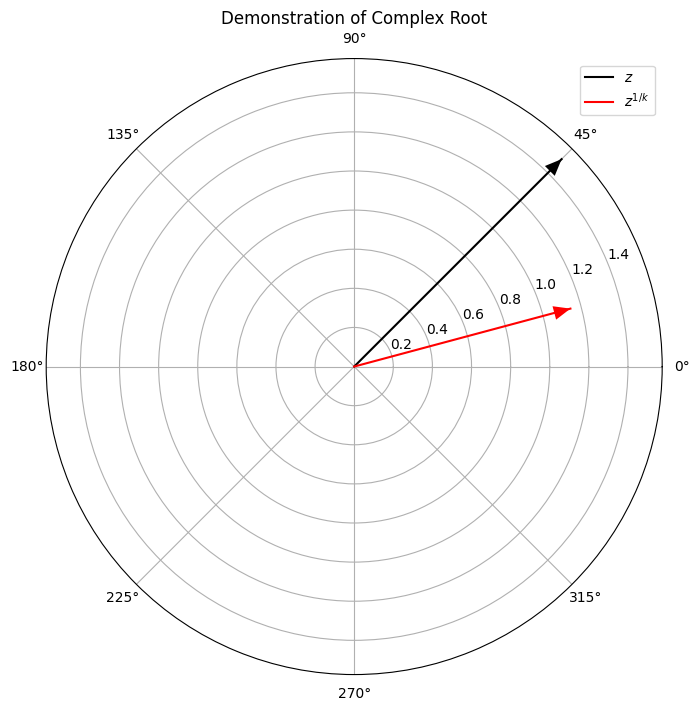

In [9]:
k = 3.0

z_root = z**(1/k)
z_root2 = z_root * np.exp(1j * np.pi * 2 * (1 / k))
print(z)
print(z_root**k)
print(z_root2**k)

plt.figure(figsize = (8, 8))
plot_polar_vector(z, label = "$z$", color = "k")
plot_polar_vector(z_root, label = "$z^{1/k}$", color = "r")
plt.legend()
plt.title("Demonstration of Complex Root")
plt.show()

## Complex Exponential Signals

Here is demonstration of a complex exponential signal,
$$x[n] = A \alpha^n,$$
where $A$ and $\alpha$ are complex numbers. You can play with these values to see how the plot below changes.

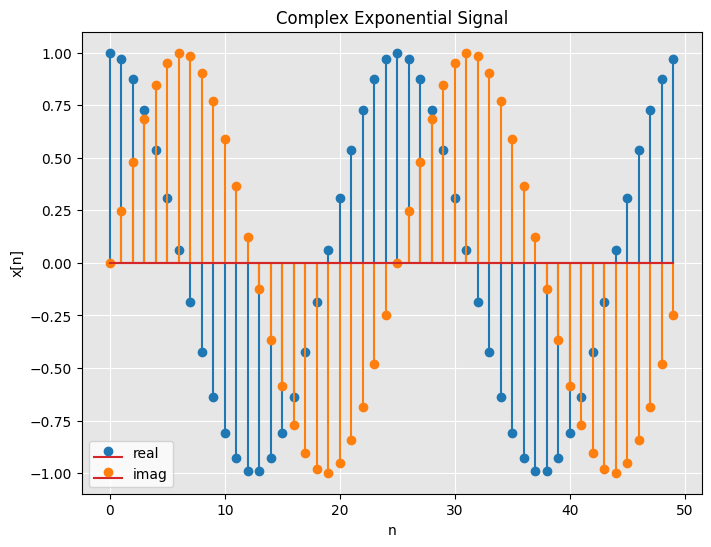

In [10]:
n = np.arange(50)

freq = 2.0 * np.pi * 2 / n.size
alpha_mag = 1.0

alpha = alpha_mag * np.exp(freq * 1.0j)

x = alpha**n

plt.figure(figsize = (8, 6))
plt.stem(np.real(x))
plt.stem(np.imag(x), linefmt = "C1")

ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))
plt.grid(color = 'white')

plt.legend(["real", "imag"])
plt.title("Complex Exponential Signal")
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

Here we are plotting the first $k$ elements of the same signal, but in the complex plane (polar plot). The first $k-1$ values are plotted gray and the final $k$th value is plotted in red. Try changing $k$ to see how the sequence progresses.

Text(0.5, 1.0, 'Exponential Signal')

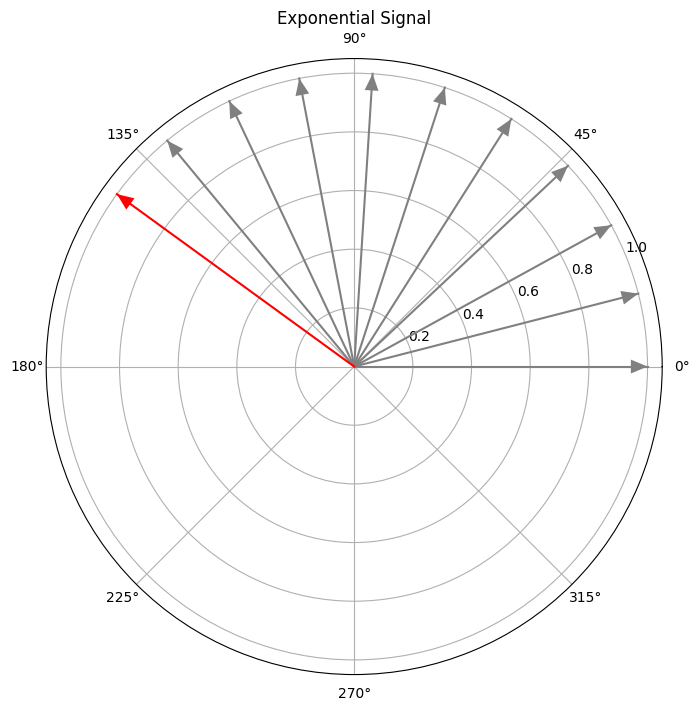

In [11]:
plt.figure(figsize = (8, 8))
k = 10
for i in range(k):
    plot_polar_vector(x[i], color = "gray")
plot_polar_vector(x[k], color = "r")
plt.title("Exponential Signal")